<a href="https://colab.research.google.com/github/Abhishek-D8mik3/Flight-Delay-Analysis/blob/main/Flight_Delay_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

pd.set_option('display.max_columns', None)


In [2]:
df= pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [ ]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,240
arr_del15,443
carrier_ct,240
weather_ct,240


In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [ ]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [ ]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.00000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000,171223.000000
mean,2018.549739,6.495284,362.946427,66.434387,20.821272,2.253015,19.404125,0.157283,23.798736,7.527686,0.86430,4244.513617,1438.889034,222.827365,921.743218,7.391478,1653.658299
std,2.891314,3.441753,993.408638,179.540694,50.339895,7.318176,61.708181,0.717809,72.431750,43.676378,3.77497,12625.199210,4217.885488,821.537321,3425.391326,41.803971,5224.663092
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,50.000000,6.000000,2.170000,0.000000,1.000000,0.000000,1.240000,0.000000,0.00000,336.000000,111.000000,0.000000,35.000000,0.000000,66.000000
50%,2019.000000,7.000000,101.000000,17.000000,6.410000,0.400000,3.930000,0.000000,5.000000,1.000000,0.00000,1020.000000,375.000000,18.000000,147.000000,0.000000,321.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.300000,1.860000,11.730000,0.000000,15.280000,4.000000,1.00000,2888.500000,1110.000000,146.000000,478.000000,0.000000,1072.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.00000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


**Exploratory Data Analysis**

---



**Which Airline have the most delays?**

<ipython-input-20-f54501d37dff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=airline_delays.index, x=airline_delays.values, palette= "coolwarm")


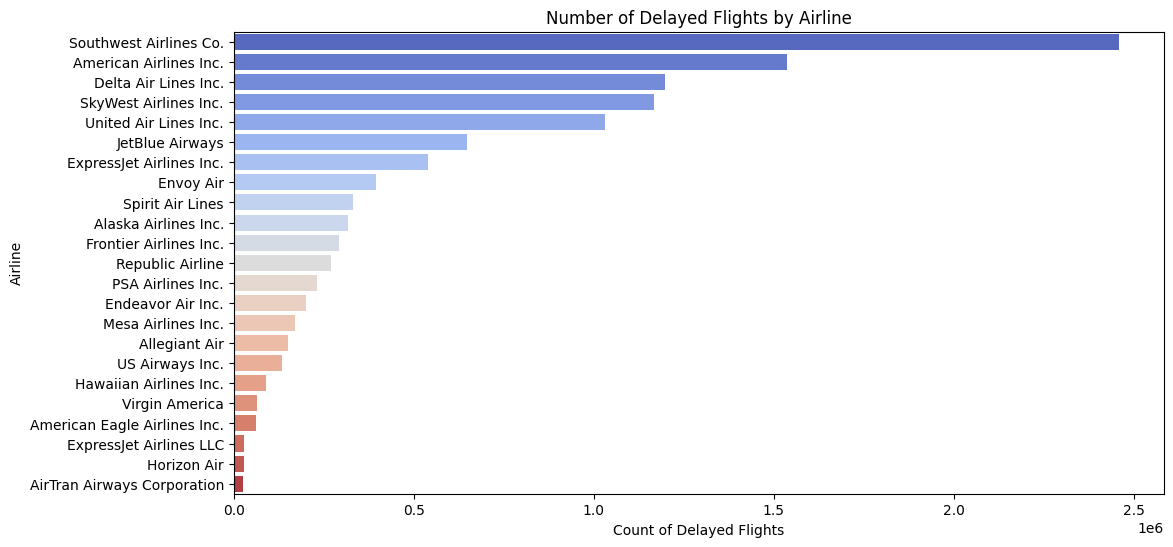

In [ ]:
#

plt.figure(figsize=(12,6))
airline_delays =df.groupby("carrier_name")["arr_del15"].sum().sort_values(ascending=False)
sns.barplot(y=airline_delays.index, x=airline_delays.values, palette= "coolwarm")
plt.title("Number of Delayed Flights by Airline")
plt.xlabel("Count of Delayed Flights")
plt.ylabel("Airline")
plt.show()

**Most punctual airline**

In [ ]:
#

most_punctual_airline = df.groupby("carrier_name")["arr_del15"].sum().sort_values(ascending=True).index[0]
print("The most punctual airline (least delay) is :", most_punctual_airline)

The most punctual airline (least delay) is : AirTran Airways Corporation


In [ ]:
print(df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


**Delay Contribution**

<ipython-input-23-47b11dc69e44>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= delay_types.index, y= delay_types.values, palette = "coolwarm")


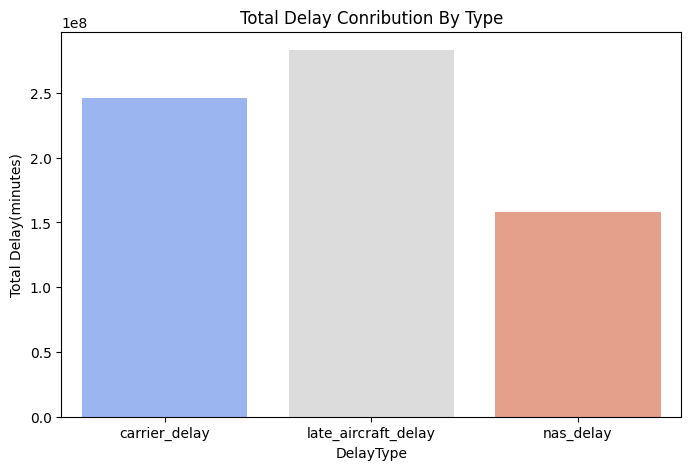

In [ ]:
delay_types = df[["carrier_delay", "late_aircraft_delay", "nas_delay"]].sum()

plt.figure(figsize=(8,5))
sns.barplot(x= delay_types.index, y= delay_types.values, palette = "coolwarm")
plt.title("Total Delay Conribution By Type")
plt.xlabel("DelayType")
plt.ylabel("Total Delay(minutes)")
plt.show()

**What Are the Main Reasons for Flight Delays?**

<ipython-input-27-604207e3f299>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_causes.index, y= delay_causes.values, palette= "coolwarm")


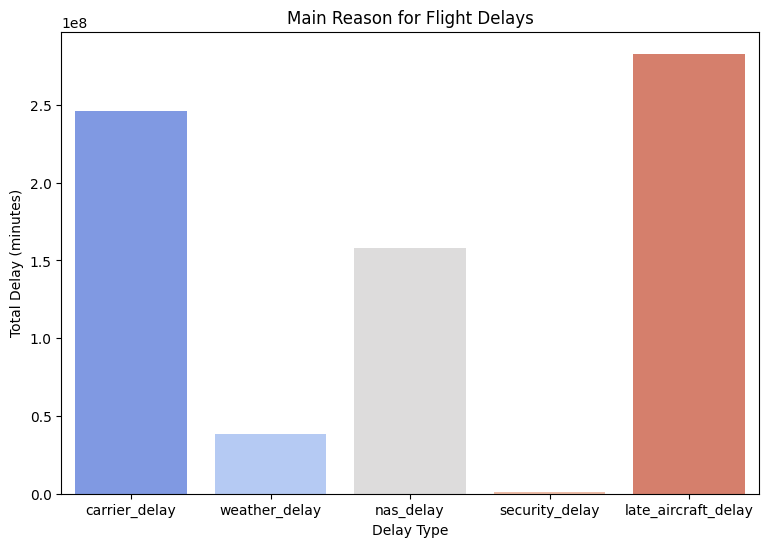

In [ ]:
#
delay_causes = df[["carrier_delay", "weather_delay","nas_delay", "security_delay","late_aircraft_delay" ]].sum()

plt.figure(figsize=(9,6))
sns.barplot(x=delay_causes.index, y= delay_causes.values, palette= "coolwarm")
plt.title("Main Reason for Flight Delays")
plt.xlabel("Delay Type")
plt.ylabel("Total Delay (minutes)")
plt.show()

**Which Airports Experience the Most Delays?**

<ipython-input-30-67a71dd84e37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=airport_delays.index[:10], x= airport_delays.values[:10], palette= "coolwarm")


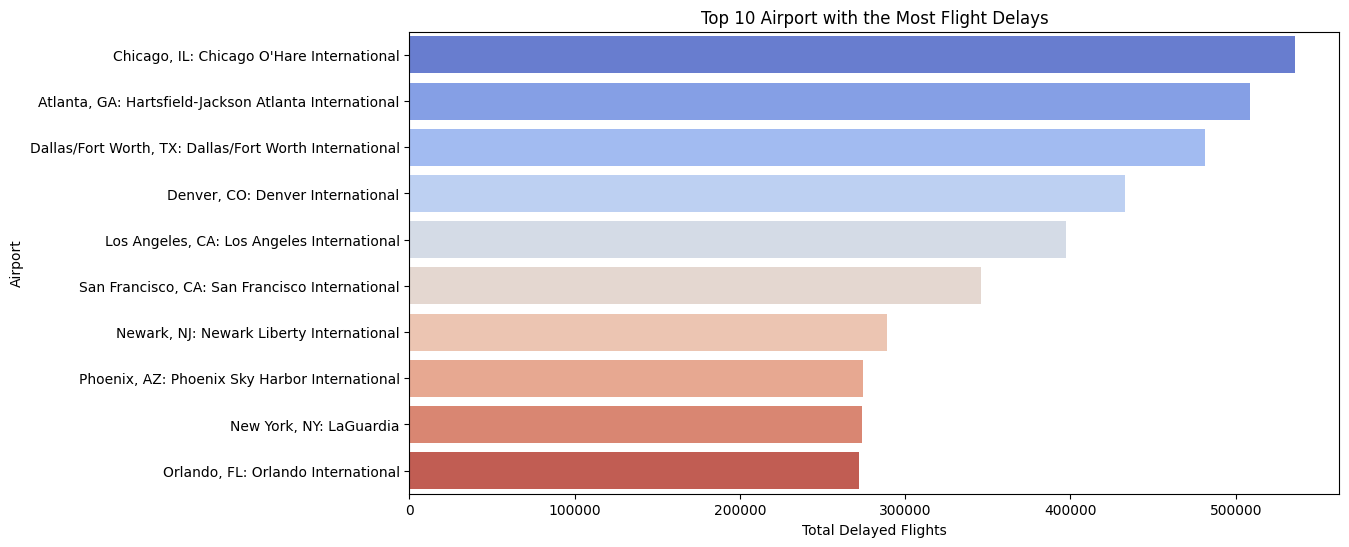

In [ ]:
#

airport_delays = df.groupby("airport_name")["arr_del15"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y=airport_delays.index[:10], x= airport_delays.values[:10], palette= "coolwarm")
plt.title("Top 10 Airport with the Most Flight Delays")
plt.xlabel("Total Delayed Flights")
plt.ylabel("Airport")
plt.show()

In [ ]:
print(df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


**Which month has the highest number of flight delays?**

<ipython-input-34-44124a1814ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= month_delay.index, y=month_delay.values, palette= "coolwarm")


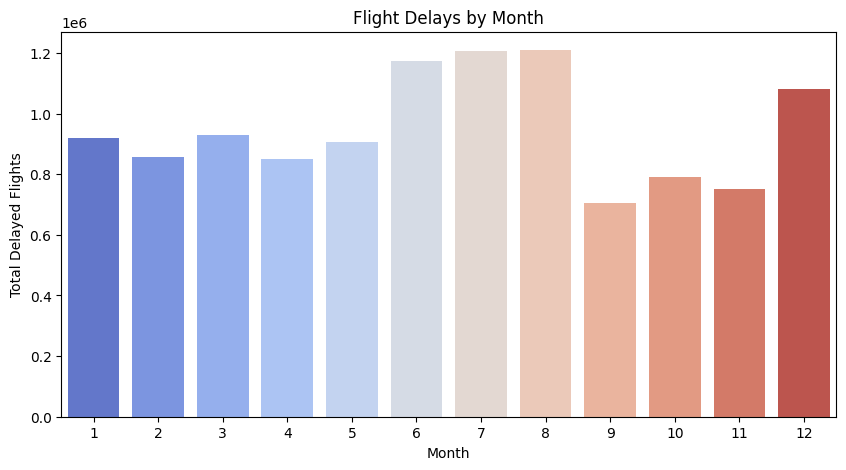

In [ ]:


month_delay = df.groupby("month")["arr_del15"].sum().sort_values(ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(x= month_delay.index, y=month_delay.values, palette= "coolwarm")
plt.title("Flight Delays by Month")
plt.xlabel("Month")
plt.ylabel("Total Delayed Flights")
plt.show()

**How do flights delay vary across diffrent airport?**

<ipython-input-11-2c06ad01ec12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=airport_delay.index[:10], x=airport_delay.values[:10], palette="coolwarm")


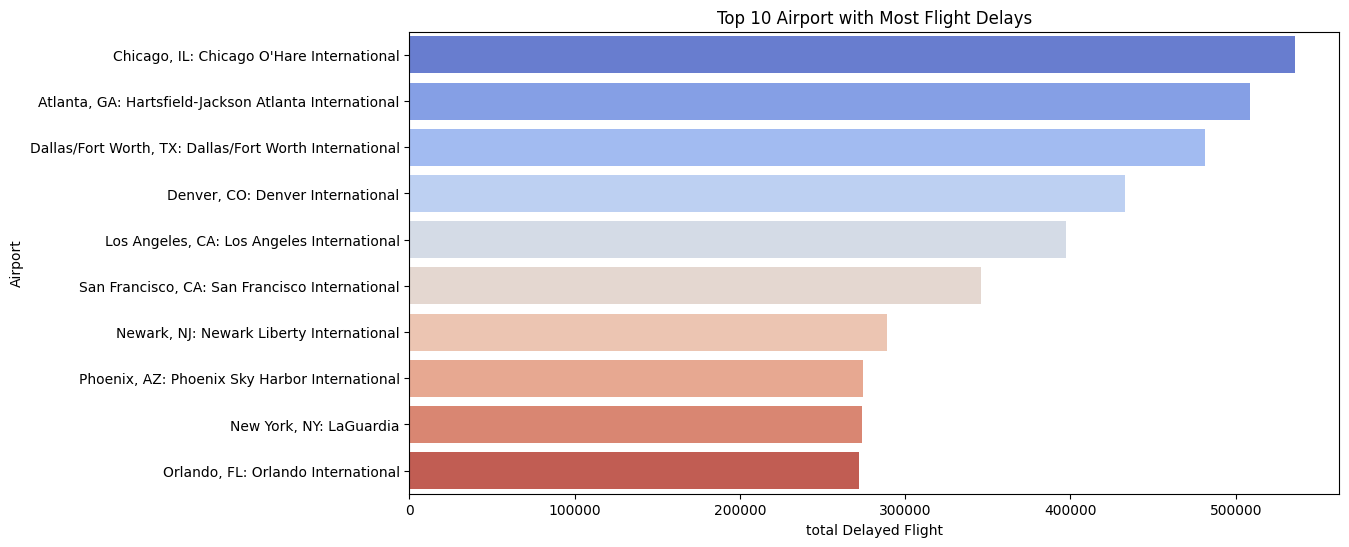

In [ ]:
airport_delay = df.groupby("airport_name")["arr_del15"].sum().sort_values(ascending= False)

plt.figure(figsize=(12,6))
sns.barplot(y=airport_delay.index[:10], x=airport_delay.values[:10], palette="coolwarm")
plt.title("Top 10 Airport with Most Flight Delays")
plt.xlabel("total Delayed Flight")
plt.ylabel("Airport")
plt.show()

**Does bad weather cause more delays as the number of flights increases?**

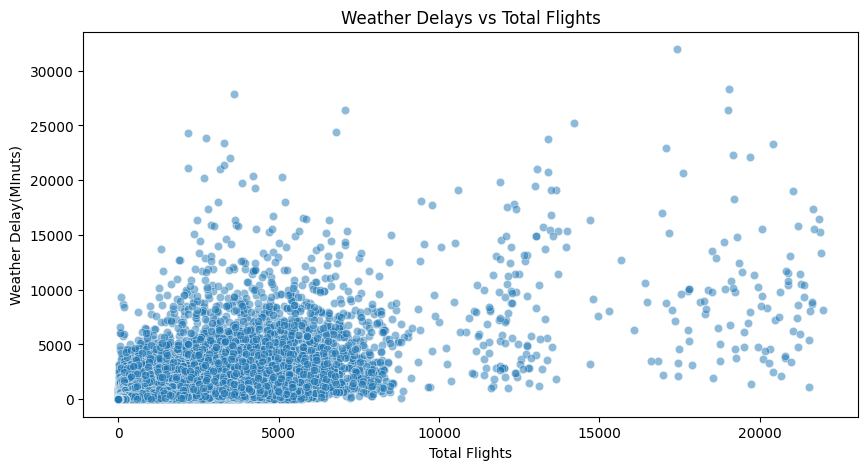

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["arr_flights"],y=df["weather_delay"], alpha= 0.5)
plt.title("Weather Delays vs Total Flights")
plt.xlabel("Total Flights")
plt.ylabel("Weather Delay(MInuts)")
plt.show()

**How have flight delays changed over time?**

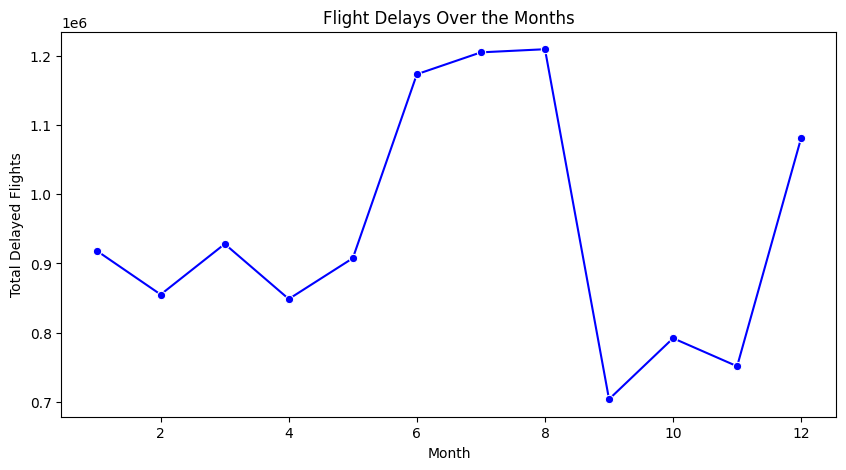

In [3]:

monthly_delays= df.groupby("month")["arr_del15"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x= monthly_delays.index, y= monthly_delays.values, marker='o', color='b')
plt.title("Flight Delays Over the Months")
plt.xlabel("Month")
plt.ylabel("Total Delayed Flights")
plt.show()

**What is the distribution of arrival delays?**

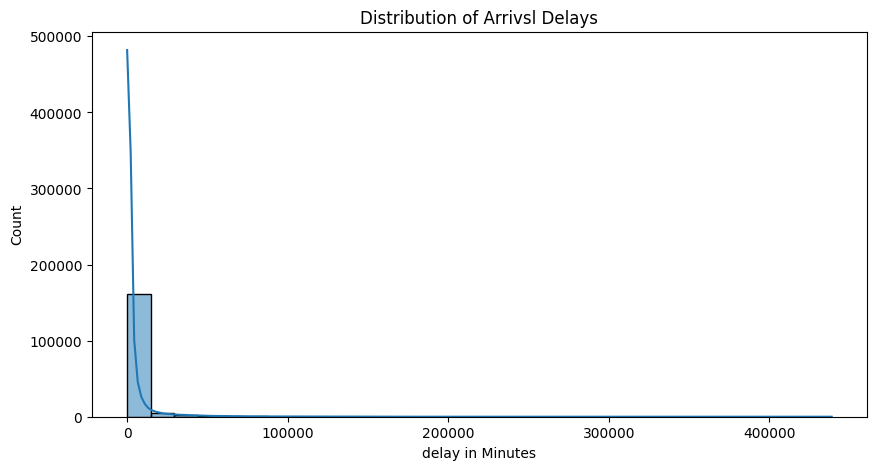

In [5]:

plt.figure(figsize=(10,5))
sns.histplot(df["arr_delay"], bins=30, kde= True)
plt.title("Distribution of Arrivsl Delays")
plt.xlabel("delay in Minutes")
plt.show()

**Convert delay from minutes to hours**

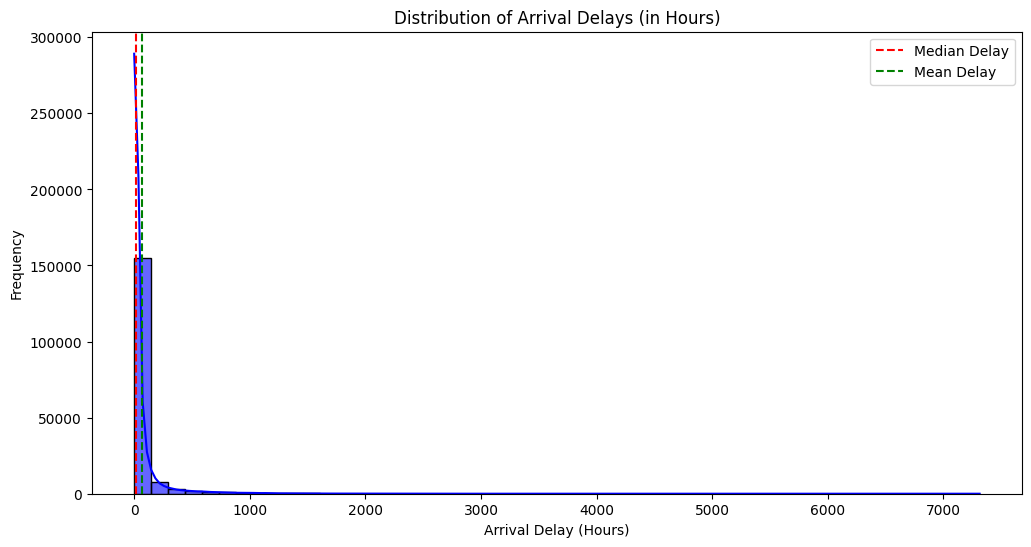

In [6]:

df["arr_delay_hours"] = df["arr_delay"] / 60

plt.figure(figsize=(12,6))

sns.histplot(df["arr_delay_hours"], bins=50, kde=True, color='blue', alpha=0.6)
plt.axvline(df["arr_delay_hours"].median(), color='red', linestyle="--", label="Median Delay")
plt.axvline(df["arr_delay_hours"].mean(), color='green', linestyle="--", label="Mean Delay")

plt.title("Distribution of Arrival Delays (in Hours)")
plt.xlabel("Arrival Delay (Hours)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Which airlines experience the highest delay variations?**

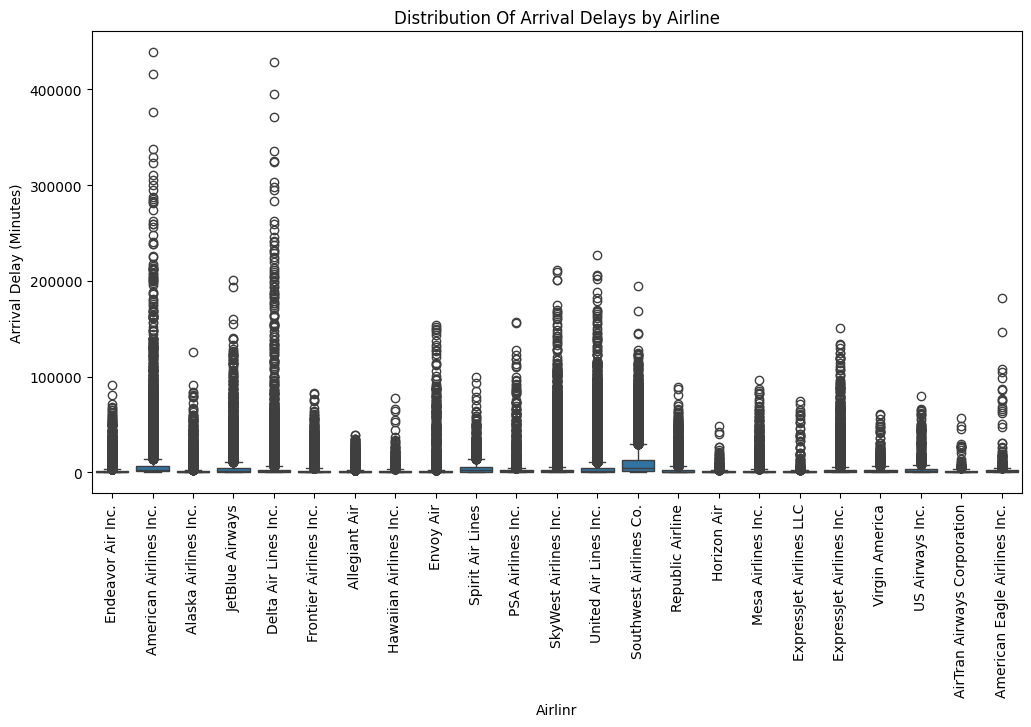

In [16]:
plt.figure(figsize= (12,6))
sns.boxplot(x= df["carrier_name"], y= df["arr_delay"])
plt.xticks(rotation=90)
plt.title("Distribution Of Arrival Delays by Airline")
plt.xlabel("Airlinr")
plt.ylabel("Arrival Delay (Minutes)")
plt.show()

**How do different types of delays contribute to overall flight disruptions?**

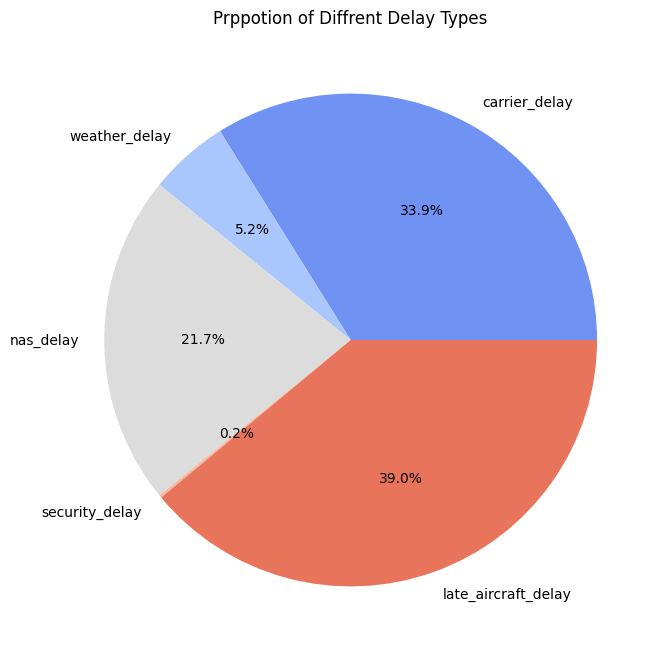

In [22]:
delay_types = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
delay_sums = df[delay_types].sum()

plt.figure(figsize=(8,8))
plt.pie(delay_sums, labels= delay_types, autopct= '%1.1f%%', colors= sns.color_palette("coolwarm", len(delay_types)))
plt.title("Prppotion of Diffrent Delay Types")
plt.show()

**Are certain months more prone to longer flight delays?**

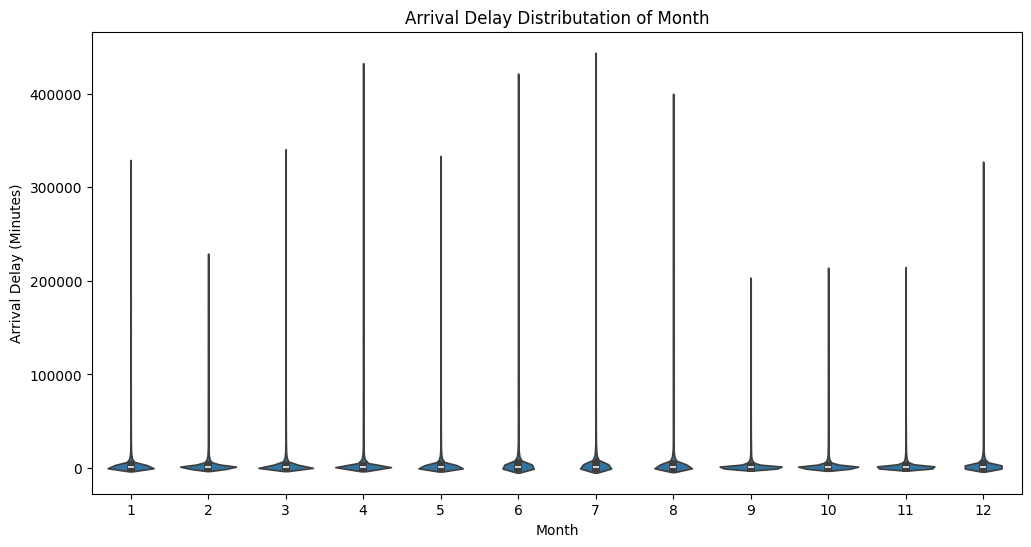

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(x= df["month"], y= df["arr_delay"])
plt.title("Arrival Delay Distributation of Month")
plt.xlabel("Month")
plt.ylabel("Arrival Delay (Minutes)")
plt.show()

**What are the strongest correlations between delay factors?**

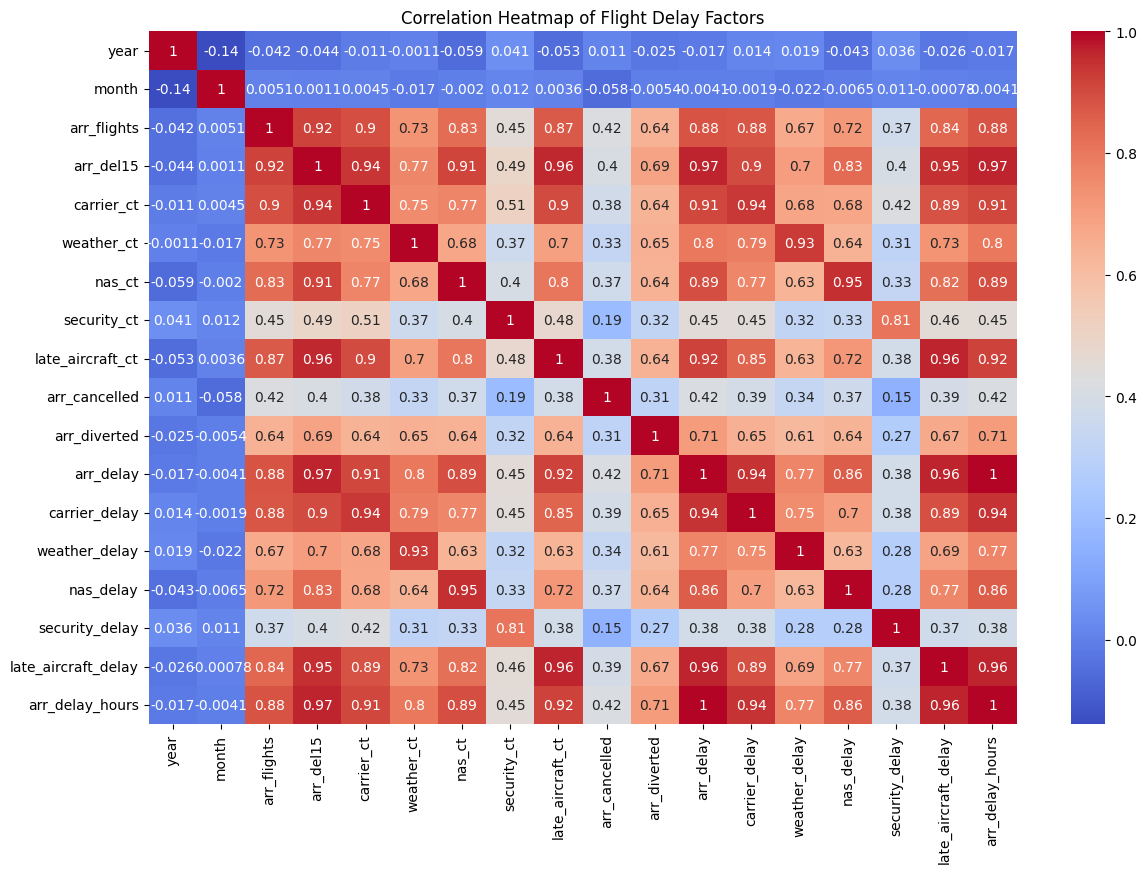

In [33]:
plt.figure(figsize=(14,9))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Flight Delay Factors")
plt.show()


**How are different types of delays related?**

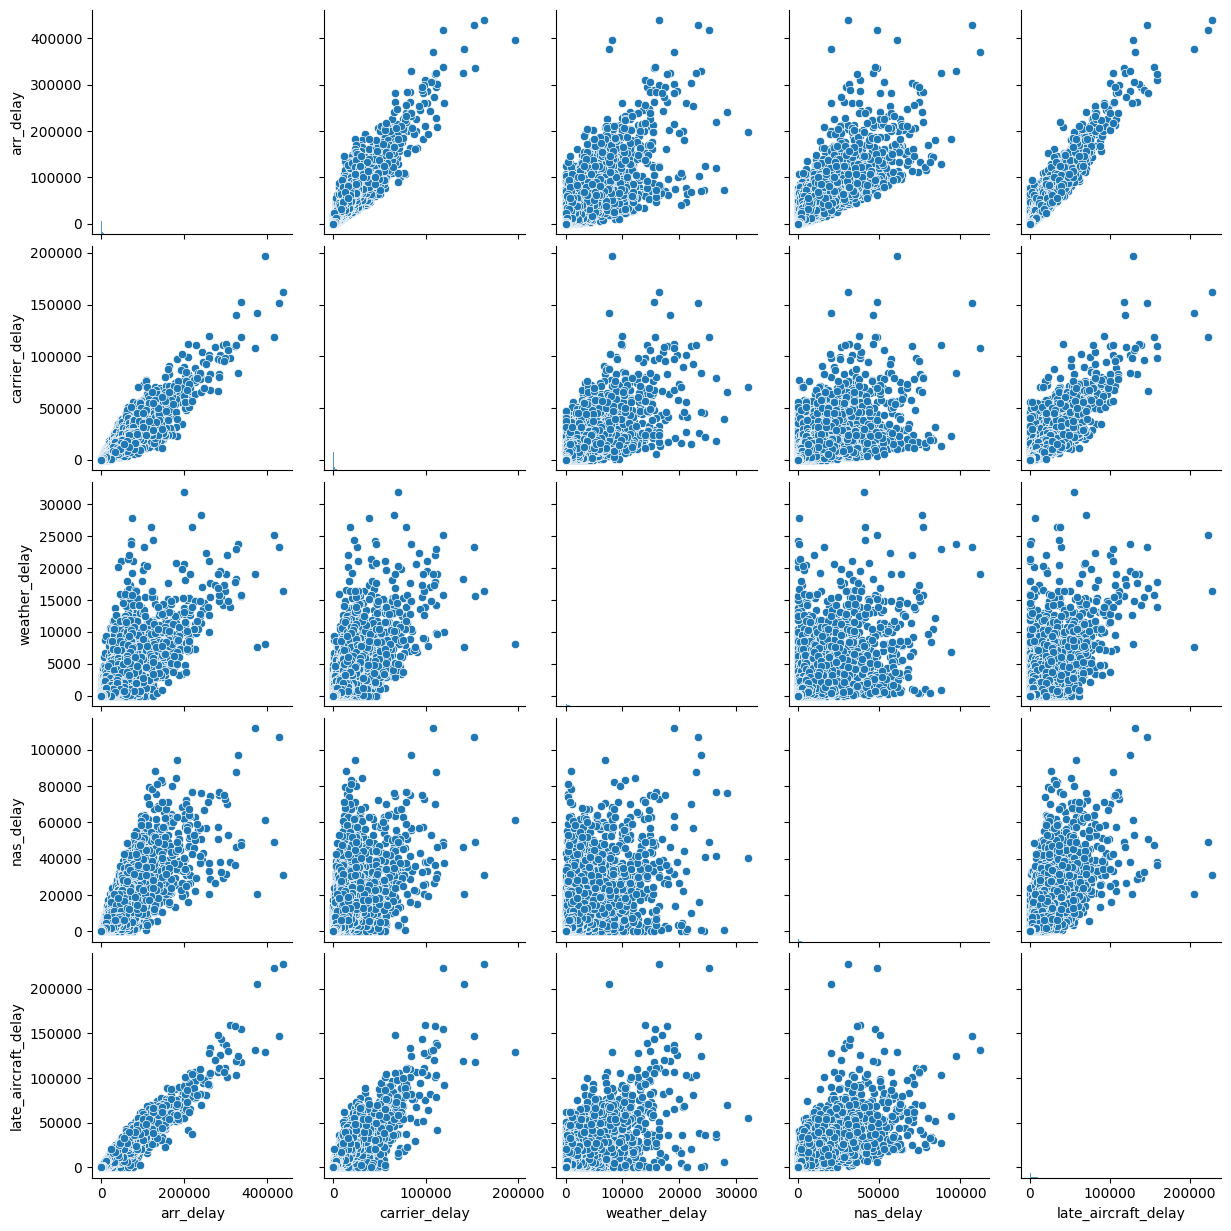

In [34]:
sns.pairplot(df[["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "late_aircraft_delay"]])
plt.show()


**Feature Engineering: Understanding Delay Severity**

Creating new columns
"delay_percentage"

Categorizing delays into Short (0-15 min), Medium (15-60 min), and Long (>60 min).

In [40]:
df["delay_percentage"]= (df["arr_del15"]/ df["arr_flights"])*100

def categorize_delay(delay):
  if delay <=15:
    return "Short Delay"
  elif delay <= 60:
    return "Medium Delay"
  else :
    return "Long Delay"

df["delay_category"]= df["delay_percentage"].apply(categorize_delay)


df[["arr_delay", "delay_percentage", "delay_category"]].head(10)


,arr_delay,delay_percentage,delay_category
0,1375.0,14.606742,Short Delay
1,799.0,16.129032,Medium Delay
2,766.0,16.129032,Medium Delay
3,1397.0,18.181818,Medium Delay
4,1530.0,23.913043,Medium Delay
5,29768.0,15.647922,Medium Delay
6,843.0,16.000000,Medium Delay
7,324.0,11.864407,Short Delay
8,707.0,20.967742,Medium Delay
9,1421.0,13.333333,Short Delay
